In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Del a: Lese fil og se struktur

In [26]:
!pip install openpyxl

df = pd.read_excel("support_uke_24.xlsx", engine='openpyxl')

#printer ut de første radene for illustrasjon.
df.head(), df.columns

(   Ukedag Klokkeslett  Varighet  Tilfredshet
 0  Mandag    08:04:16  00:07:12          NaN
 1  Mandag    08:04:53  00:02:49          6.0
 2  Mandag    08:06:31  00:08:36          NaN
 3  Mandag    08:11:21  00:04:34          NaN
 4  Mandag    08:20:46  00:07:38          NaN,
 Index(['Ukedag', 'Klokkeslett', 'Varighet', 'Tilfredshet'], dtype='object'))

### Endre kolonne navn og legge inn i array

In [27]:
u_dag = df["Ukedag"].to_numpy()
kl_slett = df["Klokkeslett"].to_numpy()
varighet = df["Varighet"].to_numpy()
score = df["Tilfredshet"].to_numpy()

#Printer ut de 3 første i hver kolonne.
print(u_dag[:3], kl_slett[:3], varighet[:3], score[:3])

['Mandag' 'Mandag' 'Mandag'] ['08:04:16' '08:04:53' '08:06:31'] ['00:07:12' '00:02:49' '00:08:36'] [nan  6. nan]


## Del b: Antall henvendelser per dag for uke 24

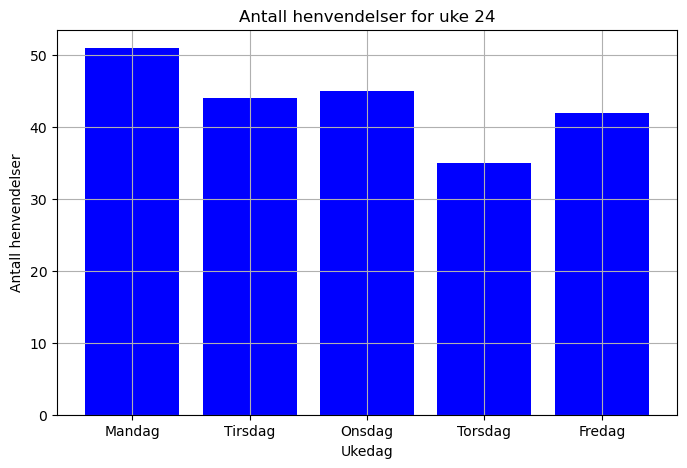

In [28]:
# Ukedagene som ønsket rekkefølge
ukedager_rekkefølge = np.array(["Mandag", "Tirsdag", "Onsdag", "Torsdag", "Fredag"])

# Tell hvor mange ganger hver ukedag forekommer
unike_dager, antall = np.unique(u_dag, return_counts=True)

# Sorter i ønsket rekkefølge
# Lager en dictionairy for rask oppslag
dag_til_antall = dict(zip(unike_dager, antall))
antall_sortert = [dag_til_antall.get(dag, 0) for dag in ukedager_rekkefølge]

# Plotting av data
plt.figure(figsize=(8, 5))
plt.bar(ukedager_rekkefølge, antall_sortert, color='b')
plt.title("Antall henvendelser for uke 24")
plt.xlabel("Ukedag")
plt.ylabel("Antall henvendelser")
plt.grid()
plt.show()

## Del c: Finne korteste og lengste samtaletid

In [29]:
# Finner min max i kolonnen "varighet"
min_varighet_np = np.min(varighet)
max_varighet_np = np.max(varighet)

print(f"Korteste samtale varte i {min_varighet_np} og lengste samtale varte i {max_varighet_np}")

Korteste samtale varte i 00:00:59 og lengste samtale varte i 00:11:28


## Del d: Beregne gjennomsnittlig samtaletid basert på alle henvendelser

In [30]:
from datetime import datetime
# Konverter tekst-tider til antall sekunder
sekunder_array = np.array([
    datetime.strptime(tid, "%H:%M:%S").hour * 3600 +
    datetime.strptime(tid, "%H:%M:%S").minute * 60 +
    datetime.strptime(tid, "%H:%M:%S").second
    for tid in varighet if isinstance(tid, str)  # filtrerer ut evt. NaN
])

# Beregn gjennomsnitt
gjennomsnitt_sekunder = int(np.mean(sekunder_array))

# Regn om til minutter og sekunder
minutter = gjennomsnitt_sekunder // 60
sekunder = gjennomsnitt_sekunder % 60

# Print i mm:ss format
print(f"Gjennomsnittlig samtaletid i uke 24 var {minutter:02}:{sekunder:02}")

Gjennomsnittlig samtaletid i uke 24 var 06:40


## Del e: Gruppere henvendesler etter 2-timers bolker

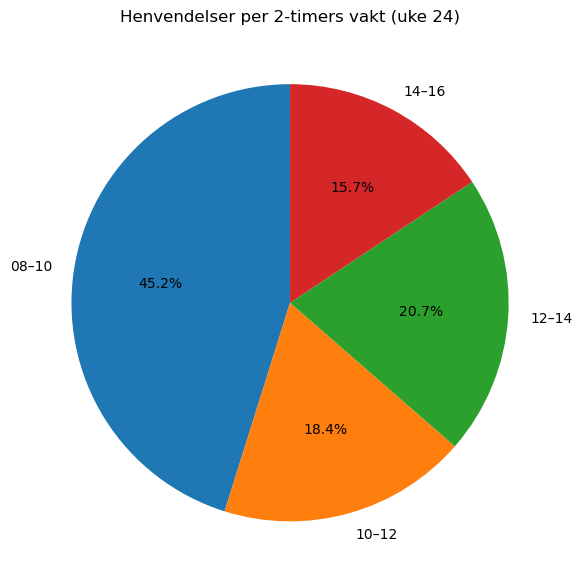

In [31]:
# Definerer tidsintervallene
intervaller = [("08:00:00", "10:00:00"),
               ("10:00:00", "12:00:00"),
               ("12:00:00", "14:00:00"),
               ("14:00:00", "16:00:00")]
etiketter = ["08–10", "10–12", "12–14", "14–16"]

def finn_intervall(tid_str):
    try:
        tid = datetime.strptime(tid_str, "%H:%M:%S").time()
    except:
        return "Utenfor vakt"
    for label, (start, slutt) in zip(etiketter, intervaller):
        if datetime.strptime(start, "%H:%M:%S").time() <= tid < datetime.strptime(slutt, "%H:%M:%S").time():
            return label
    return "Utenfor vakt"

finn_intervall_vec = np.vectorize(finn_intervall)
tidsintervaller = finn_intervall_vec(kl_slett)

# Forekomster per intervall
unikke, antall = np.unique(tidsintervaller, return_counts=True)

# Behold rekkefølge fra etiketter
teller = {k: 0 for k in etiketter}
for u, a in zip(unikke, antall):
    if u in teller:
        teller[u] = a

# plotting av data
plot_labels = list(teller.keys())
plot_values = list(teller.values())
plt.figure(figsize=(6, 6))
plt.pie(plot_values, labels=plot_labels, autopct='%1.1f%%', startangle=90)
plt.title("Henvendelser per 2-timers vakt (uke 24)")
plt.tight_layout()
plt.show()

## Del f: Beregne NPS

Oppsummering av kundetilfredshet (uke 24):

Totalt antall svar: 43
Negative (1–6): 10 svar (23.3%)
Nøytrale (7–8): 5 svar (11.6%)
Positive (9–10): 28 svar (65.1%)

NPS-score: 65.1% − 23.3% = 41.9


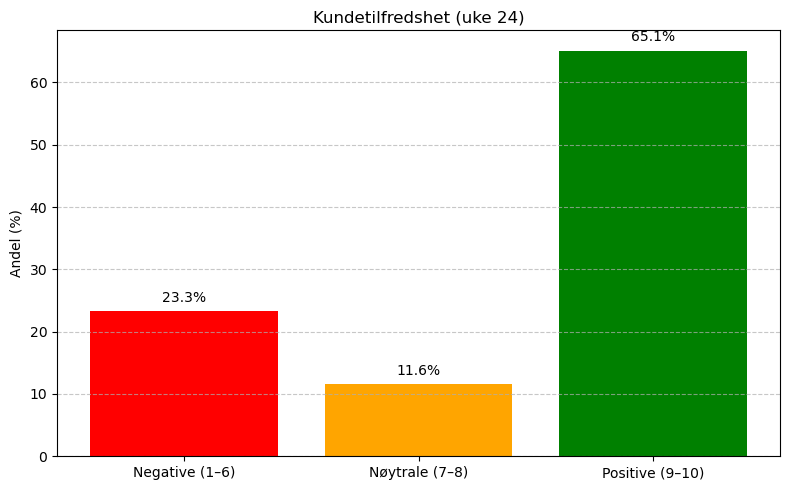

In [32]:
# Først fjerner jeg alle NaN-verdier fra score-arrayen
score_renset = score[~np.isnan(score)]

# Tell antall i hver kategori
antall_negativ = np.sum((score_renset >= 1) & (score_renset <= 6))
antall_noytral = np.sum((score_renset >= 7) & (score_renset <= 8))
antall_positiv = np.sum((score_renset >= 9) & (score_renset <= 10))
antall_total = len(score_renset)

# Beregning av prosentandeler
andel_negativ = (antall_negativ / antall_total) * 100
andel_noytral = (antall_noytral / antall_total) * 100
andel_positiv = (antall_positiv / antall_total) * 100

# Beregning NPS
nps_score = andel_positiv - andel_negativ

# Print oppsummering
print("Oppsummering av kundetilfredshet (uke 24):\n")
print(f"Totalt antall svar: {antall_total}")
print(f"Negative (1–6): {antall_negativ} svar ({andel_negativ:.1f}%)")
print(f"Nøytrale (7–8): {antall_noytral} svar ({andel_noytral:.1f}%)")
print(f"Positive (9–10): {antall_positiv} svar ({andel_positiv:.1f}%)")
print(f"\nNPS-score: {andel_positiv:.1f}% − {andel_negativ:.1f}% = {nps_score:.1f}")



# Labels og verdier
kategorier = ["Negative (1–6)", "Nøytrale (7–8)", "Positive (9–10)"]
antall = [antall_negativ, antall_noytral, antall_positiv]
prosent = [andel_negativ, andel_noytral, andel_positiv]

# Plot søylediagram
plt.figure(figsize=(8, 5))
bars = plt.bar(kategorier, prosent, color=['red', 'orange', 'green'])

# Prosenttall på toppen av søylene
for bar, verdi in zip(bars, prosent):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 1,
             f"{verdi:.1f}%", ha='center', va='bottom', fontsize=10)

plt.ylabel("Andel (%)")
plt.title("Kundetilfredshet (uke 24)")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()